# Drag coefficient in strong winds from the laboratory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import xarray as xr

## Load ASIST datasets, fresh and seawater

In [2]:
ds_fresh = xr.load_dataset('data/asist-windonly-fresh.nc')
ds_salt = xr.load_dataset('data/asist-windonly-salt.nc')

In [3]:
ds_fresh

<xarray.Dataset>
Dimensions:                              (fan: 13)
Coordinates:
  * fan                                  (fan) float64 0.0 5.0 ... 55.0 60.0
Data variables:
    U_irgason                            (fan) float64 0.1762 1.543 ... 20.56
    W_irgason                            (fan) float64 -0.0001038 ... 0.001782
    U_irgason_error                      (fan) float64 0.0009428 ... 0.0009428
    W_irgason_error                      (fan) float64 0.0004714 ... 0.0004714
    uw_irgason                           (fan) float64 -0.0005605 ... -0.3307
    uw_irgason_error                     (fan) float64 -0.00109 ... -0.004275
    U_pitot                              (fan) float64 0.3714 1.744 ... 22.38
    U_pitot_error                        (fan) float64 0.1522 0.1522 ... 0.1521
    U_hotfilm                            (fan) float64 1.656 1.954 ... 24.52
    W_hotfilm                            (fan) float64 0.0001827 ... -0.0005776
    uw_hotfilm                           (fan) float64 -0.0005605 ... -0.3307
    air_pressure_gradient                (fan) float64 0.0006001 ... -20.65
    air_pressure_gradient_error          (fan) float64 0.07758 ... 0.07759
    mean_water_elevation_gradient        (fan) float64 -5.217e-05 ... 0.003682
    wave_radiation_stress_gradient       (fan) float64 -6.441e-07 ... 0.3783
    bottom_stress                        (fan) float64 0.0002094 ... 0.04202
    bottom_stress_error                  (fan) float64 0.0108 0.0109 ... 0.01644
    stress_momentum_budget_error         (fan) float64 0.1677 0.1678 ... 0.1769
    mean_water_elevation_error           (fan) float64 3.418e-05 ... 3.625e-05
    mean_water_elevation_gradient_error  (fan) float64 8.924e-06 ... 9.464e-06
    stress_momentum_budget               (fan) float64 -0.2149 -0.2632 ... 6.289
    stress_irgason                       (fan) float64 -0.0253 -0.01345 ... 4.6
    stress_hotfilm                       (fan) float64 -0.02491 ... 4.825
    U10_hotfilm                          (fan) float64 nan nan ... 36.83 40.13
    CD_hotfilm                           (fan) float64 nan nan ... 0.002497
    U10_irgason                          (fan) float64 nan nan ... 34.87 37.89
    U10_irgason_error                    (fan) float64 nan nan ... 0.1129
    U10_momentum_budget                  (fan) float64 nan nan ... 38.72 42.64
    U10_momentum_budget_error            (fan) float64 nan nan ... 0.3174 0.285
    CD_irgason                           (fan) float64 nan nan ... 0.002671
    CD_irgason_error                     (fan) float64 nan nan ... 5.044e-05
    CD_momentum_budget                   (fan) float64 nan nan ... 0.002882
    CD_momentum_budget_error             (fan) float64 nan nan ... 0.0001196
Attributes:
    Institution:        SUSTAIN Laboratory
    Project:            asist-drag-2018
    Experiment:         asist-windonly-fresh
    irgason_fetch:      6.12
    irgason_height:     0.29
    irgason_frequency:  20
    pitot_fetch:        4.69
    pitot_height:       0.29
    pitot_frequency:    10

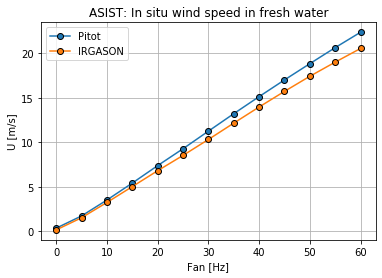

In [4]:
plt.plot(ds_fresh['fan'], ds_fresh['U_pitot'], marker='o', mec='k', label='Pitot')
plt.plot(ds_fresh['fan'], ds_fresh['U_irgason'], marker='o', mec='k', label='IRGASON')
plt.legend()
plt.xlabel('Fan [Hz]')
plt.ylabel('U [m/s]')
plt.title('ASIST: In situ wind speed in fresh water')
plt.grid()

Text(0.5, 1.0, 'This study: Drag coefficient in fresh water')

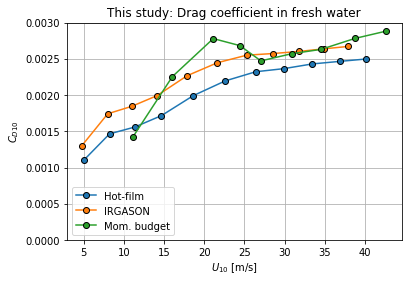

In [5]:
plt.plot(ds_fresh['U10_hotfilm'], ds_fresh['CD_hotfilm'], marker='o', mec='k', label='Hot-film')
plt.plot(ds_fresh['U10_irgason'], ds_fresh['CD_irgason'], marker='o', mec='k', label='IRGASON')
plt.plot(ds_fresh['U10_momentum_budget'], ds_fresh['CD_momentum_budget'], marker='o', mec='k', label='Mom. budget')
plt.legend()
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10}$')
plt.ylim(0, 3e-3)
plt.grid()
plt.title('This study: Drag coefficient in fresh water')

In [6]:
ds_salt

<xarray.Dataset>
Dimensions:                              (fan: 13)
Coordinates:
  * fan                                  (fan) float64 0.0 5.0 ... 55.0 60.0
Data variables:
    U_irgason                            (fan) float64 0.1708 1.48 ... nan nan
    W_irgason                            (fan) float64 0.00114 -0.001422 ... nan
    U_irgason_error                      (fan) float64 0.0009428 ... nan
    W_irgason_error                      (fan) float64 0.0004714 ... nan
    uw_irgason                           (fan) float64 -0.002494 ... nan
    uw_irgason_error                     (fan) float64 -0.0003378 ... nan
    U_pitot                              (fan) float64 0.308 1.534 ... 22.41
    U_pitot_error                        (fan) float64 0.1521 0.1521 ... 0.1522
    U_hotfilm                            (fan) float64 0.02477 1.696 ... 24.54
    W_hotfilm                            (fan) float64 8.326e-05 ... -0.0006077
    uw_hotfilm                           (fan) float64 -0.002494 ... nan
    air_pressure_gradient                (fan) float64 0.0004221 ... -19.35
    air_pressure_gradient_error          (fan) float64 0.0776 0.07758 ... 0.0776
    mean_water_elevation_gradient        (fan) float64 -1.407e-05 ... 0.003151
    wave_radiation_stress_gradient       (fan) float64 -1.828e-05 ... 0.2938
    bottom_stress                        (fan) float64 0.001737 ... 0.04784
    bottom_stress_error                  (fan) float64 0.01179 ... 0.0173
    stress_momentum_budget_error         (fan) float64 0.1724 0.1726 ... 0.1811
    mean_water_elevation_error           (fan) float64 3.418e-05 ... 3.585e-05
    mean_water_elevation_gradient_error  (fan) float64 8.925e-06 ... 9.36e-06
    stress_momentum_budget               (fan) float64 -0.06129 ... 5.137
    stress_irgason                       (fan) float64 -0.02293 ... nan
    stress_hotfilm                       (fan) float64 -0.02628 ... 4.391
    U10_hotfilm                          (fan) float64 nan nan ... 36.19 39.34
    CD_hotfilm                           (fan) float64 nan nan ... 0.002364
    U10_irgason                          (fan) float64 nan nan 4.824 ... nan nan
    U10_irgason_error                    (fan) float64 nan nan ... nan nan
    U10_momentum_budget                  (fan) float64 nan nan ... 36.69 40.72
    U10_momentum_budget_error            (fan) float64 nan nan ... 0.3657 0.3229
    CD_irgason                           (fan) float64 nan nan ... nan nan
    CD_irgason_error                     (fan) float64 nan nan ... nan nan
    CD_momentum_budget                   (fan) float64 nan nan ... 0.002581
    CD_momentum_budget_error             (fan) float64 nan nan ... 0.000132
Attributes:
    Institution:        SUSTAIN Laboratory
    Project:            asist-drag-2018
    Experiment:         asist-windonly-salt
    irgason_fetch:      6.12
    irgason_height:     0.29
    irgason_frequency:  20
    pitot_fetch:        4.69
    pitot_height:       0.29
    pitot_frequency:    10

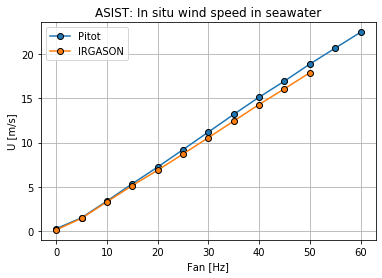

In [7]:
plt.plot(ds_salt['fan'], ds_salt['U_pitot'], marker='o', mec='k', label='Pitot')
plt.plot(ds_salt['fan'], ds_salt['U_irgason'], marker='o', mec='k', label='IRGASON')
plt.legend()
plt.xlabel('Fan [Hz]')
plt.ylabel('U [m/s]')
plt.title('ASIST: In situ wind speed in seawater')
plt.grid()

Text(0.5, 1.0, 'This study: Drag coefficient in seawater')

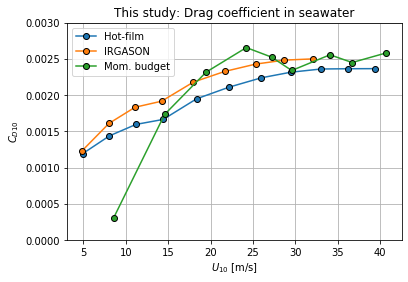

In [8]:
plt.plot(ds_salt['U10_hotfilm'], ds_salt['CD_hotfilm'], marker='o', mec='k', label='Hot-film')
plt.plot(ds_salt['U10_irgason'], ds_salt['CD_irgason'], marker='o', mec='k', label='IRGASON')
plt.plot(ds_salt['U10_momentum_budget'], ds_salt['CD_momentum_budget'], marker='o', mec='k', label='Mom. budget')
plt.legend()
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10}$')
plt.ylim(0, 3e-3)
plt.grid()
plt.title('This study: Drag coefficient in seawater')

## Load reference datasets

### Edson et al. (2013), field data

In [9]:
e13 = np.loadtxt('data/edson_etal_2013.txt', skiprows=1)
U10_e13, CD_e13, CD_std_e13 = e13[:,0], e13[:,1], e13[:,2]

Text(0.5, 1.0, 'Edson et al. (2013), field data')

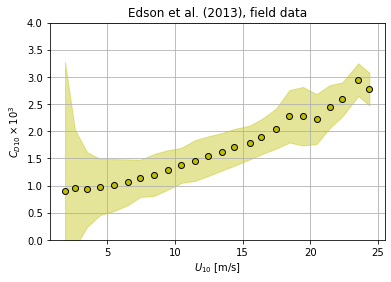

In [10]:
plt.plot(U10_e13, CD_e13, 'yo', mec='k')
plt.fill_between(U10_e13, CD_e13 - CD_std_e13, CD_e13 + CD_std_e13, alpha=0.4, color='y')
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10} \times 10^3$')
plt.ylim(0, 4)
plt.grid()
plt.title('Edson et al. (2013), field data')

### Donelan et al. (2004), laboratory data

In [11]:
# momentum budget
mat = loadmat('data/donelan_etal_2004/dragplt2.mat')
U10_d04_mb, CD_d04_mb = mat['U10CD'][0].real, mat['CD'][0].real

# eddy-covariance from TSI hot film
mat = loadmat('data/donelan_etal_2004/uwcd.mat')
U10_d04_hf, CD_d04_hf = mat['U10uw'][0], mat['cduw'][0]

Text(0.5, 1.0, 'Donelan et al. (2004), laboratory data')

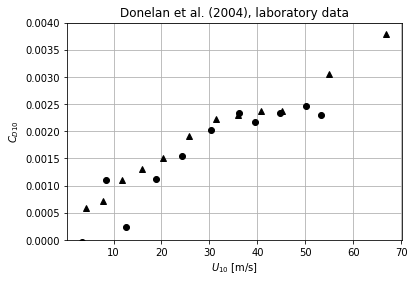

In [12]:
# all data plotted here; original paper omits last few data points of 
# hot-film and first few of momentum budget due to high error and uncertainty
plt.plot(U10_d04_hf, CD_d04_hf, 'k^')
plt.plot(U10_d04_mb, CD_d04_mb, 'ko')
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10}$')
plt.ylim(0, 4e-3)
plt.grid()
plt.title('Donelan et al. (2004), laboratory data')

### Takagaki et al. (2012), laboratory data

In [13]:
t12 = np.loadtxt('data/takagaki_etal_2012.csv', delimiter=',', skiprows=1)
U10_t12, CD_t12 = t12[:,1], t12[:,2]

Text(0.5, 1.0, 'Takagaki et al. (2012), laboratory data')

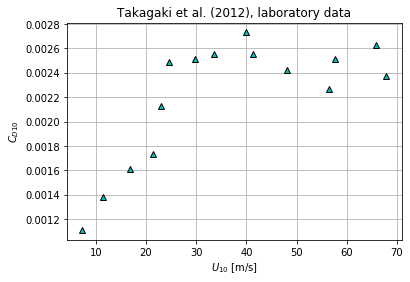

In [14]:
plt.plot(U10_t12, CD_t12, 'c^', mec='k')
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10}$')
plt.grid()
plt.title('Takagaki et al. (2012), laboratory data')

## Putting it all together: Fig. 2 of Curcic and Haus (2020)

Text(0, 0.5, '$C_{D10}\\ \\times\\ 10^3$')

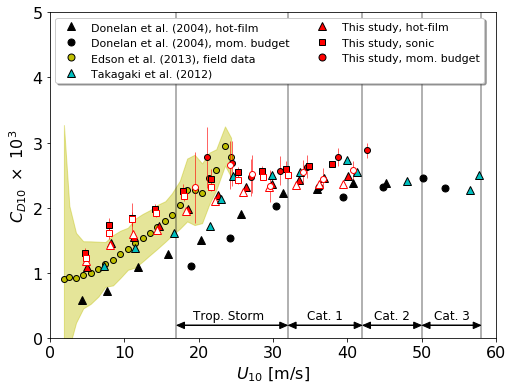

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, xlim=(0, 60), ylim=(0, 5))
ax.tick_params(axis='both', labelsize=16)

for wspd in [17, 32, 42, 50, 58]:
    plt.plot([wspd, wspd], [0, 5], 'k-', lw=2, alpha=0.3)

plt.arrow(17.1, 0.2, 14.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(31.9, 0.2, -14.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(32.1, 0.2, 9.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(41.9, 0.2, -9.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(42.1, 0.2, 7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(49.9, 0.2, -7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(50.1, 0.2, 7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(57.9, 0.2, -7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.text(24, 0.3, 'Trop. Storm', ha='center', fontsize=12)
plt.text(37, 0.3, 'Cat. 1', ha='center', fontsize=12)
plt.text(46, 0.3, 'Cat. 2', ha='center', fontsize=12)
plt.text(54, 0.3, 'Cat. 3', ha='center', fontsize=12)

# remove high-error momentum budget estimates
ds_fresh['CD_momentum_budget'][:6] = np.nan
ds_salt['CD_momentum_budget'][:6] = np.nan

# this study
# fresh water
plt.plot(ds_fresh['U10_hotfilm'], ds_fresh['CD_hotfilm'] * 1e3, 'r^', ms=8, mec='k', zorder=10) # hotfilm
plt.errorbar(ds_fresh['U10_momentum_budget'], ds_fresh['CD_momentum_budget'] * 1e3, 
             yerr=ds_fresh['CD_momentum_budget_error'] * 1e3, color='r', 
             marker='o', ms=6, lw=0.6, mec='k', linestyle='', zorder=10)
plt.errorbar(ds_fresh['U10_irgason'], ds_fresh['CD_irgason'] * 1e3, 
             yerr=ds_fresh['CD_irgason_error'] * 1e3, color='r', 
             marker='s', ms=6, lw=0.6, mec='k', linestyle='', zorder=10)

# seawater
plt.plot(ds_salt['U10_hotfilm'], ds_salt['CD_hotfilm'] * 1e3, 'w^', ms=8, mec='r', zorder=10) # hotfilm
plt.errorbar(ds_salt['U10_momentum_budget'], ds_salt['CD_momentum_budget'] * 1e3, 
             yerr=ds_salt['CD_momentum_budget_error'] * 1e3, color='r', 
             marker='o', ms=6, lw=0.6, mfc='w', mec='r', linestyle='', zorder=10)
plt.errorbar(ds_salt['U10_irgason'], ds_salt['CD_irgason'] * 1e3, 
             yerr=ds_salt['CD_irgason_error'] * 1e3, color='r', 
             marker='s', ms=6, lw=0.6, mfc='w', mec='r', linestyle='', zorder=10)

# Donelan et al. (2004)
plt.plot(U10_d04_hf[:-2], CD_d04_hf[:-2] * 1e3, 'k^', ms=8)
plt.plot(U10_d04_mb[4:], CD_d04_mb[4:] * 1e3, 'k.', ms=14)

# Edson et al. (2013)
plt.plot(U10_e13, CD_e13, color='y', marker='o', ms=6, mec='k', linestyle='')
plt.fill_between(U10_e13, CD_e13 - CD_std_e13, CD_e13 + CD_std_e13, color='y', alpha=0.4)

# Takagaki et al. (2012)
plt.plot(U10_t12, CD_t12 * 1e3, 'c^', ms=8, mec='k', zorder=10)

plt.plot(np.nan, np.nan, 'k^', ms=8, label='Donelan et al. (2004), hot-film')
plt.plot(np.nan, np.nan, 'k.', ms=14, label='Donelan et al. (2004), mom. budget')
plt.plot(np.nan, np.nan, 'y.', ms=14, mec='k', label='Edson et al. (2013), field data')
plt.plot(np.nan, np.nan, 'c^', ms=8, mec='k', label='Takagaki et al. (2012)')
plt.plot(np.nan, np.nan, 'r^', ms=8, mec='k', label='This study, hot-film')
plt.plot(np.nan, np.nan, 'rs', ms=6, mec='k', label='This study, sonic')
plt.plot(np.nan, np.nan, 'r.', ms=14, mec='k', label='This study, mom. budget')
plt.legend(loc='upper left', fancybox=True, shadow=True, ncol=2, prop={'size': 11})

plt.xlabel(r'$U_{10}$ [m/s]', fontsize=16)
plt.ylabel(r'$C_{D10}\ \times\ 10^3$', fontsize=16)